# Handwriting Recognition using K-Means

The U.S. Postal Service has been using machine learning and scanning technologies since 1999. Because its postal offices have to look at roughly half a billion pieces of mail every day, they have done extensive research and developed very efficient algorithms for reading and understanding addresses. And not only the post office:

ATMs can recognize handwritten bank checks
Evernote can recognize handwritten task lists
Expensify can recognize handwritten receipts
But how do they do it?

In this project, we will be using K-means clustering (the algorithm behind this magic) and scikit-learn to cluster images of handwritten digits.

In [11]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

digits = datasets.load_digits()


In [12]:
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [13]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


To visualize the data images, we need to use Matplotlib. Let’s visualize the image at index 100:

<Figure size 432x288 with 0 Axes>

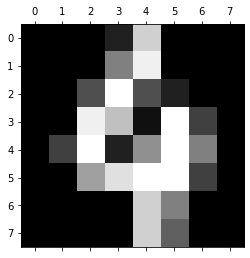

In [14]:
plt.gray() 

plt.matshow(digits.images[100])

plt.show()

Is it a 4? Let’s print out the target label at index 100 to find out!

In [15]:
print(digits.target[100])

4


To take a look at 64 sample images. Copy and paste the code below

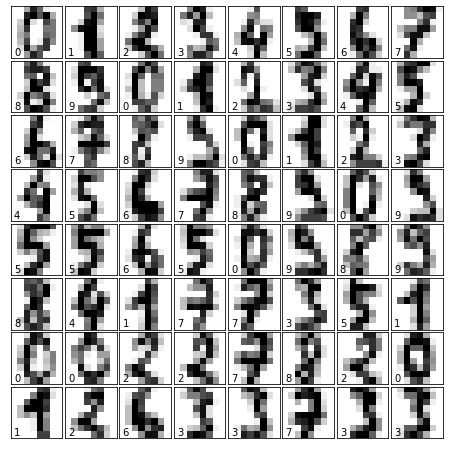

In [16]:
# Figure size (width, height)

fig = plt.figure(figsize=(6, 6))

# Adjust the subplots 

fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# For each of the 64 images

for i in range(64):

    # Initialize the subplots: add a subplot in the grid of 8 by 8, at the i+1-th position

    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])

    # Display an image at the i-th position

    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

    # Label the image with the target value

    ax.text(0, 7, str(digits.target[i]))

plt.show()

## K-Means Clustering:

In [17]:
model = KMeans(init='k-means++',n_clusters=10, random_state=42)
model.fit(digits.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

Let’s visualize all the centroids! Because data samples live in a 64-dimensional space, the centroids have values so they can be images!

First, add a figure of size 8x3 using .figure().

Then, add a title using .suptitle()


Scikit-learn sometimes calls centroids “cluster centers”.

The cluster centers should be a list with 64 values (0-16).

Here, we are making each of the cluster centers into an 8x8 2D array.

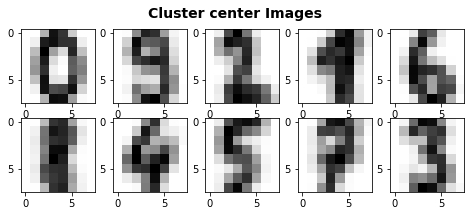

In [18]:
fig = plt.figure(figsize=(8,3))

fig.suptitle('Cluster center Images', fontsize=14, fontweight= 'bold')

for i in range(10):

  # Initialize subplots in a grid of 2X5, at i+1th position
  ax = fig.add_subplot(2, 5, 1 + i)

  # Display images
  ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)
plt.show()

In [29]:
# new_labels = np.array([
# [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.46,3.57,5.33,5.33,3.57,0.22,0.00,1.28,7.15,4.87,2.36,2.51,6.23,3.57,0.00,3.50,4.26,0.00,0.00,0.00,1.89,6.25,0.00,3.81,3.81,0.00,0.00,0.00,0.83,6.85,0.00,2.20,6.69,0.83,0.00,0.00,1.52,6.09,0.00,0.00,4.09,6.61,2.43,0.99,3.49,5.48,0.00,0.00,0.00,3.17,5.86,6.78,6.09,1.73,0.00],
# [0.00,0.00,0.15,0.30,0.00,0.00,0.00,0.00,0.00,1.28,6.53,7.15,3.64,0.00,0.00,0.00,0.00,1.14,2.88,1.73,7.31,0.61,0.00,0.00,0.00,0.00,0.00,1.65,7.23,0.45,0.00,0.00,0.00,0.00,0.90,7.46,6.22,0.52,0.00,0.00,0.00,0.00,0.00,1.59,5.16,5.17,0.00,0.00,0.00,0.00,0.00,0.00,2.26,6.09,0.00,0.00,0.00,1.52,7.62,7.61,7.30,2.79,0.00,0.00],
# [0.00,0.00,0.83,3.65,3.65,1.05,0.00,0.00,0.00,0.30,7.29,7.22,6.01,7.22,1.28,0.00,0.00,0.30,7.15,6.85,0.98,3.72,4.57,0.00,0.00,0.00,1.14,0.75,0.00,1.75,6.09,0.00,0.00,0.00,0.00,0.00,0.00,5.01,4.03,0.00,0.00,0.00,0.00,0.45,4.62,6.47,0.37,0.00,0.00,2.21,4.33,7.08,4.86,0.75,0.00,0.00,0.00,3.27,3.65,1.28,0.00,0.00,0.00,0.00],
# [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,6.85,7.62,7.45,3.57,0.00,0.00,0.00,0.00,0.45,0.00,2.12,6.78,0.00,0.00,0.00,0.00,0.75,4.49,7.00,3.11,0.00,0.00,0.00,0.00,2.28,6.55,7.46,6.54,1.05,0.00,0.00,0.00,0.00,0.00,0.37,6.24,2.20,0.00,0.00,0.15,3.65,4.03,6.78,4.95,0.22,0.00,0.00,0.15,3.65,3.81,1.44,0.00,0.00,0.00]
# ]) #0393

# new_labels = np.array([
# [0.00,0.00,1.21,2.43,5.10,1.67,0.00,0.00,0.00,5.63,7.62,7.62,7.15,1.67,0.00,0.00,0.00,5.71,6.02,1.21,0.30,0.00,0.00,0.00,0.00,6.55,4.88,0.99,2.51,3.65,0.45,0.00,0.00,6.86,7.62,7.62,7.62,7.62,2.89,0.00,0.00,4.33,4.72,2.82,3.19,7.62,3.05,0.00,0.00,1.13,3.73,6.63,7.62,6.70,0.91,0.00,0.00,5.94,7.54,5.63,2.81,0.38,0.00,0.00],
# [0.00,0.00,1.44,2.90,3.73,4.57,0.91,0.00,0.00,0.60,7.54,7.62,7.54,6.47,1.37,0.00,0.00,0.00,5.79,5.72,0.08,0.00,0.00,0.00,0.00,0.00,5.11,6.17,0.00,0.00,0.00,0.00,0.00,0.00,4.42,7.39,5.79,7.54,4.17,0.00,0.00,0.00,3.19,7.62,5.86,6.09,6.86,0.00,0.00,0.00,0.07,0.68,1.67,6.63,6.62,0.00,0.00,0.00,0.00,0.00,5.86,6.78,1.52,0.00],
# [0.00,0.07,0.76,1.29,2.97,5.10,5.86,0.37,0.00,2.81,7.62,7.62,7.62,6.78,4.94,0.22,0.00,0.45,7.62,5.79,3.95,2.28,0.00,0.00,0.00,0.00,7.38,7.62,7.61,7.62,1.13,0.00,0.00,0.00,0.98,1.22,4.56,7.62,1.36,0.00,0.00,0.00,0.23,4.56,7.62,4.72,0.00,0.00,0.45,3.73,6.47,7.62,3.95,0.07,0.00,0.00,1.82,7.54,5.86,1.97,0.00,0.00,0.00,0.00],
# [0.00,0.00,0.00,0.98,1.44,0.37,0.00,0.00,0.00,0.22,4.25,7.47,7.62,7.00,1.81,0.00,0.00,4.10,7.62,4.71,2.57,6.61,7.54,2.04,0.00,5.33,5.71,0.00,0.00,0.68,6.84,5.02,0.00,5.33,6.24,0.23,0.00,0.00,5.41,5.33,0.00,3.11,7.62,4.25,0.23,2.13,7.46,4.48,0.00,0.07,4.85,7.62,7.62,7.62,6.09,0.68,0.00,0.00,0.07,2.20,3.04,3.04,0.46,0.00]
# ]) #5550

# new_labels = np.array([
# [0.00,0.00,0.00,0.45,1.82,0.00,0.00,0.00,0.00,0.00,0.00,3.04,7.62,0.68,0.00,0.00,0.00,0.00,0.00,2.29,7.62,0.76,0.00,0.00,0.00,0.00,0.00,2.29,7.62,0.76,0.00,0.00,0.00,0.00,0.00,2.29,7.62,0.76,0.00,0.00,0.00,0.00,0.00,2.29,7.62,0.76,0.00,0.00,0.00,0.00,0.00,1.82,7.39,0.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
# [0.00,1.29,4.94,7.62,5.86,1.82,0.00,0.00,0.90,7.39,7.24,4.64,6.77,7.16,1.13,0.00,1.44,7.62,3.48,1.67,2.65,7.39,4.04,0.00,0.07,6.30,7.62,7.62,6.62,6.25,4.57,0.00,0.00,0.37,2.88,2.50,2.20,7.54,3.88,0.00,0.00,0.00,0.00,1.97,6.93,6.55,0.60,0.00,0.00,0.68,4.26,7.55,6.47,1.14,0.00,0.00,0.00,3.57,7.61,4.63,0.30,0.00,0.00,0.00],
# [0.00,1.06,4.71,5.33,4.48,0.98,0.00,0.00,0.00,7.00,7.31,5.48,7.38,5.85,0.00,0.00,0.00,7.45,4.55,0.00,4.18,6.86,0.00,0.00,0.00,4.78,7.54,1.67,5.02,6.63,0.00,0.00,0.00,0.38,4.87,2.80,7.38,4.71,0.00,0.00,0.00,0.00,0.45,6.62,7.16,1.06,0.00,0.00,0.00,1.06,6.32,7.54,1.89,0.00,0.00,0.00,0.00,4.34,7.23,2.20,0.00,0.00,0.00,0.00],
# [0.00,0.00,0.53,3.04,1.59,0.00,0.00,0.00,0.00,1.74,7.15,7.61,7.14,0.00,0.00,0.00,0.00,2.96,6.08,4.40,7.62,0.00,0.00,0.00,0.00,0.00,0.00,6.00,7.61,3.57,0.15,0.00,0.00,0.00,0.00,7.14,7.38,7.62,0.76,0.00,0.00,0.00,0.00,0.90,5.63,7.55,0.60,0.00,0.00,1.82,5.26,7.32,7.31,2.73,0.00,0.00,0.00,2.96,6.32,4.48,0.90,0.00,0.00,0.00]
# ]) #1993

# new_labels = np.array([
# [0.00,0.00,0.00,0.00,0.45,0.65,0.00,0.00,0.00,0.00,0.10,1.24,1.97,1.88,1.02,0.00,0.00,0.00,1.54,1.41,0.34,0.20,2.01,0.33,0.00,0.21,1.99,0.04,0.00,0.00,0.91,1.58,0.00,0.19,1.99,0.15,0.00,0.00,0.08,1.95,0.00,0.00,1.34,1.24,0.00,0.00,0.00,1.54,0.00,0.00,0.19,1.93,1.03,0.65,0.94,1.99,0.00,0.00,0.00,0.34,1.27,1.52,1.32,0.39],
# [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.37,1.03,0.61,0.04,0.00,0.00,0.00,0.35,1.99,1.43,1.79,1.39,0.00,0.00,0.00,1.64,0.97,0.00,0.12,1.95,0.26,0.00,0.00,1.90,0.66,0.00,0.00,1.78,0.40,0.00,0.00,0.49,1.99,0.50,0.71,2.01,0.08,0.00,0.00,0.00,0.62,2.05,1.77,0.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
# [0.00,0.16,0.68,0.36,0.00,0.00,0.00,0.00,0.06,1.85,1.58,2.00,0.90,0.00,0.00,0.00,0.43,1.77,0.00,0.86,2.04,0.13,0.00,0.00,0.23,2.00,0.34,0.00,1.65,0.68,0.00,0.00,0.00,0.88,2.06,1.94,2.11,0.75,0.00,0.00,0.00,0.41,1.92,0.75,0.85,2.00,0.10,0.00,0.00,0.58,1.96,0.67,0.49,2.05,0.15,0.00,0.00,0.00,0.81,1.68,1.73,1.21,0.00,0.00],
# [0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.28,0.43,0.43,0.60,0.14,0.00,0.00,0.09,1.82,1.75,1.72,1.91,0.86,0.00,0.00,0.00,0.00,0.00,0.00,1.59,0.62,0.00,0.00,0.00,0.00,0.00,0.36,2.00,0.12,0.00,0.00,0.00,0.00,0.00,1.17,1.28,0.00,0.00,0.00,0.00,0.00,0.06,2.00,0.39,0.00,0.00,0.00,0.00,0.00,0.04,0.82,0.00,0.00,0.00]
# ]) #0087

new_labels = np.array([
[0.00,0.85,0.28,0.00,0.00,0.00,0.00,0.00,0.57,8.83,9.49,8.16,6.64,5.12,3.69,0.00,0.00,0.00,0.66,2.27,3.79,5.68,9.49,0.00,0.00,0.00,0.00,0.00,0.00,3.32,7.78,0.00,0.00,0.00,0.00,0.85,3.79,8.06,6.35,0.47,0.00,0.00,0.00,2.37,8.06,8.54,5.69,0.85,0.00,0.00,0.00,0.19,8.63,3.22,0.00,0.00,0.00,0.00,0.00,3.03,8.06,0.00,0.00,0.00],
[0.00,0.00,2.27,2.84,2.09,1.90,1.90,1.90,0.00,0.00,5.69,7.40,7.60,7.60,8.64,9.39,0.00,0.00,0.00,0.00,0.00,1.99,8.73,3.69,0.00,0.00,0.00,2.46,3.41,8.92,6.72,2.56,0.00,0.00,0.57,8.35,9.49,6.93,6.64,6.36,0.00,0.00,0.00,7.97,4.46,0.00,0.00,0.00,0.00,0.00,1.61,8.63,0.09,0.00,0.00,0.00,0.00,0.00,0.09,1.23,0.00,0.00,0.00,0.00],
[0.00,0.00,0.66,0.66,0.00,0.00,0.00,0.00,0.00,0.00,8.15,9.50,9.11,8.54,8.06,7.58,0.00,0.00,0.00,0.28,1.13,2.84,8.63,6.92,0.00,0.00,1.61,3.60,3.31,8.53,5.69,0.19,0.00,0.00,2.55,8.90,9.19,6.07,0.00,0.00,0.00,0.00,5.21,8.44,1.42,0.00,0.00,0.00,0.00,0.00,6.26,1.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
[0.00,0.00,0.00,0.00,1.04,0.47,0.00,0.00,0.00,0.00,0.09,4.26,8.63,6.91,0.09,0.00,0.00,0.00,6.33,8.14,3.12,7.87,6.06,0.00,0.00,0.00,8.52,2.27,0.00,1.23,9.27,0.47,0.00,0.00,5.11,7.76,1.98,0.00,8.61,0.94,0.00,0.00,0.19,5.02,8.91,7.96,8.23,0.47,0.00,0.00,0.00,0.00,1.13,3.41,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00]
]) #7770

In [30]:
new_labels = model.predict(new_labels)

for i in range(len(new_labels)):
  if new_labels[i] == 0:
    print(0, end='')
  elif new_labels[i] == 1:
    print(9, end='')
  elif new_labels[i] == 2:
    print(2, end='')
  elif new_labels[i] == 3:
    print(1, end='')
  elif new_labels[i] == 4:
    print(6, end='')
  elif new_labels[i] == 5:
    print(8, end='')
  elif new_labels[i] == 6:
    print(4, end='')
  elif new_labels[i] == 7:
    print(5, end='')
  elif new_labels[i] == 8:
    print(7, end='')
  elif new_labels[i] == 9:
    print(3, end='')

1771